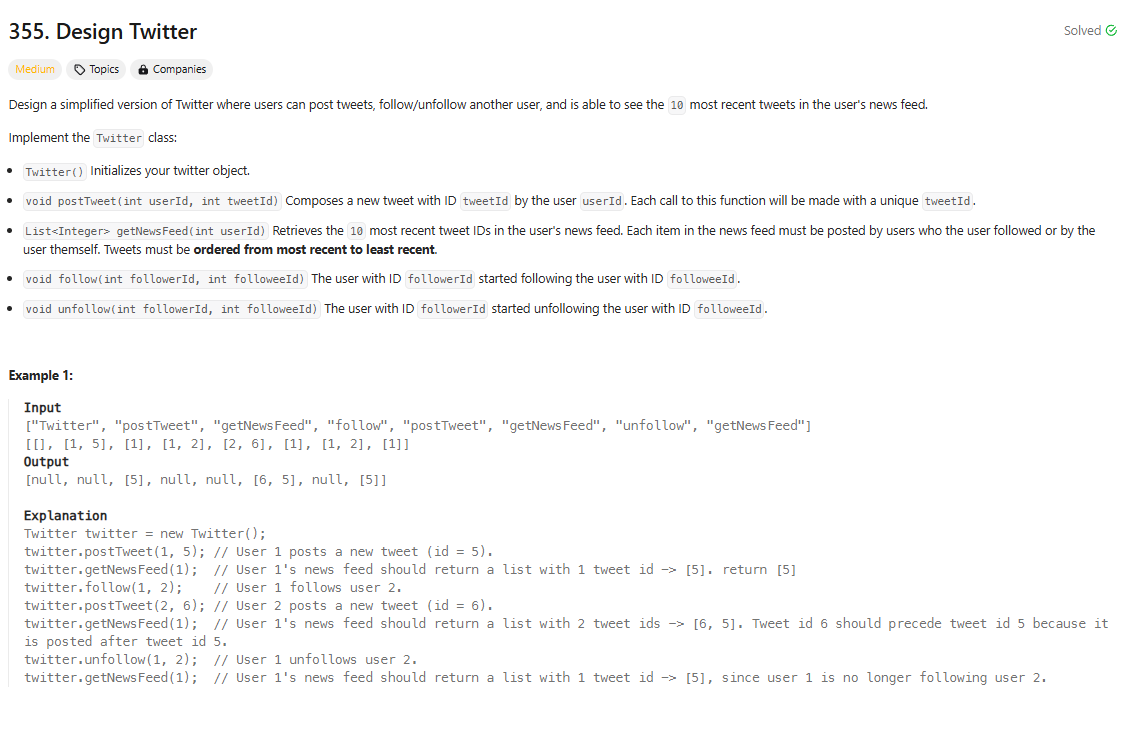

In [ ]:
# Solution 1 (two pointer)
# Time: getNewsFeed O((K + 1) * 10) where K is number of followees + themself. 10 is because we keep 10 newest posts for each user.

from functools import reduce
from itertools import islice

class Twitter:
    def __init__(self):
        self.posts = defaultdict(lambda: deque(maxlen=10))
        self.connections = defaultdict(set)
        self.time = 0

    def __mergeTen(self, A, B):
        i = 0
        j = 0

        result = deque(maxlen=10)
        while len(result) < 10:
            if len(A) <= i or len(B) <= j:
                break
            
            if A[i][0] > B[j][0]:
                result.append(A[i])
                i += 1
            else:
                result.append(B[j])
                j += 1
        
        result.extend(islice(A, i, i + (10 - len(result))))
        result.extend(islice(B, j, j + (10 - len(result))))
        return result

    def postTweet(self, userId: int, tweetId: int) -> None:
        user_posts = self.posts[userId]
        user_posts.appendleft((self.time, tweetId))
        self.time += 1

        if len(user_posts) > 10:
            user_posts.pop()
        

    def getNewsFeed(self, userId: int) -> List[int]:
        folowee_posts = [self.posts[userId],]
        for followee in self.connections[userId]:
            folowee_posts.append(self.posts[followee])
        return [i[1] for i in reduce(self.__mergeTen, folowee_posts)]
        
    def follow(self, followerId: int, followeeId: int) -> None:
        self.connections[followerId].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.connections[followerId]:
            self.connections[followerId].remove(followeeId)

In [ ]:
# Solution 1 (two pointer)
# Time: getNewsFeed O((K + 1) * 10 log10) where K is number of followees + themself. 10 is because we keep 10 newest posts for each user.

from functools import reduce
from itertools import islice

class Twitter:
    def __init__(self):
        self.posts = defaultdict(lambda: deque(maxlen=10))
        self.connections = defaultdict(set)
        self.time = 0

    def postTweet(self, userId: int, tweetId: int) -> None:
        user_posts = self.posts[userId]
        user_posts.appendleft((self.time, tweetId))
        self.time += 1

        if len(user_posts) > 10:
            user_posts.pop()
        
    def getNewsFeed(self, userId: int) -> List[int]:
        folowee_posts = list(self.posts[userId])
        for followee in self.connections[userId]:
            folowee_posts.extend(self.posts[followee])
        return [i[1] for i in heapq.nlargest(10, folowee_posts)]
        
    def follow(self, followerId: int, followeeId: int) -> None:
        self.connections[followerId].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.connections[followerId]:
            self.connections[followerId].remove(followeeId)